<a href="https://colab.research.google.com/github/YABIGAIL23/INVESTIGACI-N-DE-OPERACIONES/blob/main/Problemas_de_redes_con_la_librer%C3%ADa_networkx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ARBOL DE EXPANSION

Dado un grafo conexo, no dirigido G. Un árbol de expansión es un árbol compuesto por todos los vértices y algunas (posiblemente todas) de las aristas de G. Al ser creado un árbol no existirán ciclos, además debe existir una ruta entre cada par de vértices.

En la imagen se puede observar que el grafo dado posee 3 arboles de expansión, dichos arboles cumplen con las propiedades antes mencionadas como son unir todos los vértices usando algunas aristas.

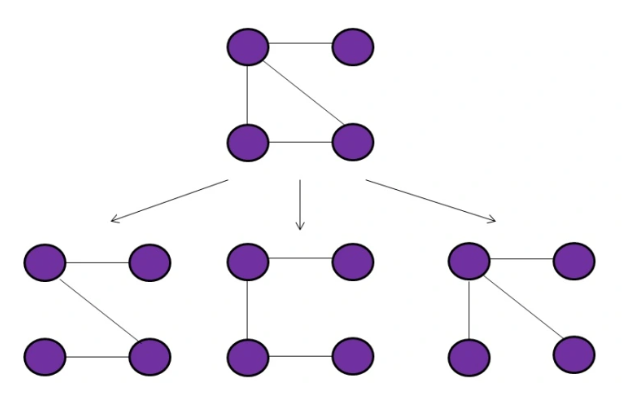

## Árbol de Expansión Mínima

Dado un grafo conexo, no dirigido y con pesos en las aristas, un árbol de expansión mínima es un árbol compuesto por todos los vértices y cuya suma de sus aristas es la de menor peso. Al ejemplo anterior le agregamos pesos a sus aristas y obtenemos los arboles de expansiones siguientes:

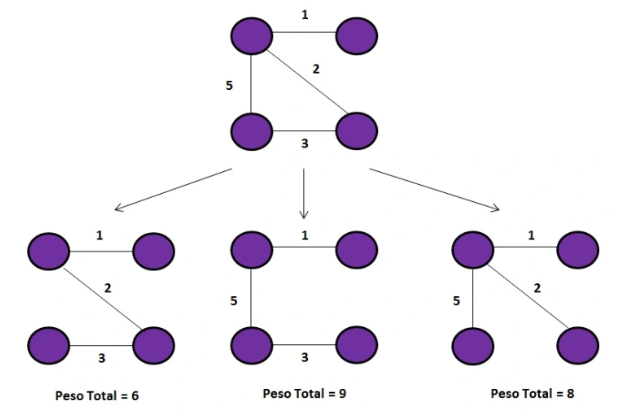


EJEMPLO


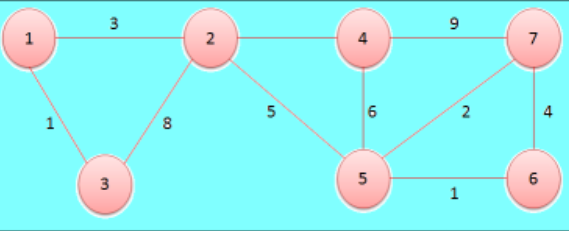

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

In [4]:
#Grafo vacío
G = nx.Graph()

In [5]:
#Añadimos los nodos que contiene la imagen
G.add_nodes_from([1, 2, 3, 4, 5, 6, 7])

In [6]:
#Agregamos los pesos
edges = [
    (1, 2, 3),
    (1, 3, 1),
    (2, 3, 8),
    (2, 4, 5),
    (2, 5, 5),
    (4, 5, 6),
    (4, 7, 9),
    (5, 6, 1),
    (5, 7, 2),
    (6, 7, 4) ]

G.add_weighted_edges_from(edges)

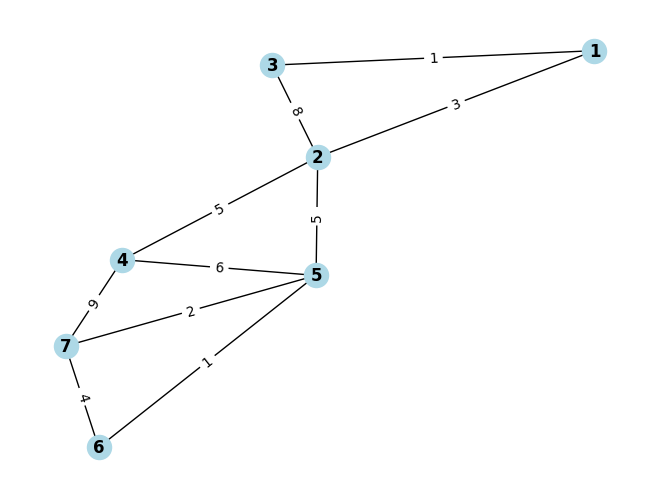

In [7]:
#Dibujar el grafo original
pos = nx.spring_layout(G, seed=20)
nx.draw(G, pos, with_labels=True, node_color="lightblue",font_weight="bold")
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): d["weight"] for u, v, d in G.edges(data=True)})
plt.show()


Usamos el Algoritmo KRUSKAL

In [8]:
#Calculamos el Árbol de Mínima Expansión con Kruskal
ame = nx.minimum_spanning_tree(G, algorithm="kruskal")

#Mostramos las aristas del Árbol
print("Aristas del Árbol de Mínima Expansión:")
for u, v, d in ame.edges(data=True):
    print(f"{u} - {v} (peso: {d['weight']})")


Aristas del Árbol de Mínima Expansión:
1 - 3 (peso: 1)
1 - 2 (peso: 3)
2 - 4 (peso: 5)
2 - 5 (peso: 5)
5 - 6 (peso: 1)
5 - 7 (peso: 2)


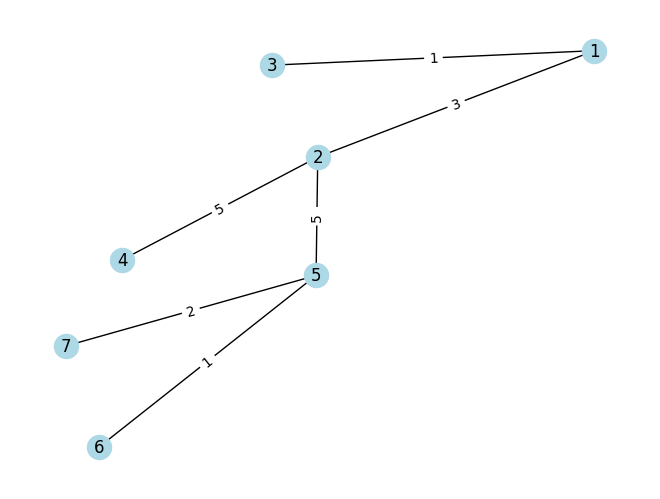

In [9]:
#Arbol
plt.figure()
nx.draw(ame, pos, with_labels=True, node_color='lightblue')
nx.draw_networkx_edge_labels(ame, pos, edge_labels={(u, v): d["weight"] for u, v, d in ame.edges(data=True)})
plt.show()

## LA RUTA MAS CORTA

El método de la ruta más corta es un método de programación lineal que permite encontrar la solución óptima a problemas de optimización en redes. Busca encontrar la ruta o camino de menor costo entre un nodo origen y cada uno de los demás nodos de la red. Tiene importantes aplicaciones como el transporte, telecomunicaciones, planeación de producción y más. Existen algoritmos como el de Dijkstra y Floyd-Warshall para resolver este problema de forma eficiente.


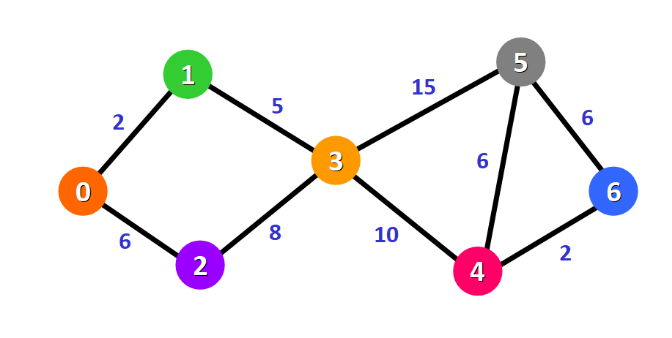

Solucion

In [36]:
#Grafo
D = nx.Graph()

In [37]:
#Nodos
D.add_nodes_from(["0", "1", "2", "3", "4", "5", "6"])

In [38]:
#Aristas con sus pesos
edges = [
    ("0", "1", 2), ("0", "2", 6),
    ("1", "3", 5),
    ("2", "3", 8),
    ("3", "5", 15), ("3", "4", 10),
    ("4", "5", 6),
    ("4", "6", 2),
    ("5", "6", 6)
     ]

D.add_weighted_edges_from(edges)

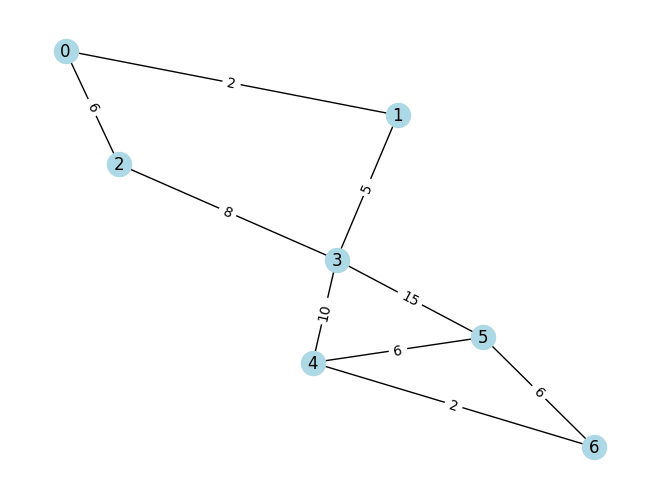

In [39]:
#Dibujar el grafo
pos = nx.spring_layout(D, seed=20)
plt.figure()
nx.draw(D, pos, with_labels=True, node_color='lightblue')
nx.draw_networkx_edge_labels(D, pos, edge_labels={(u, v): d["weight"] for u, v, d in D.edges(data=True)})
plt.show()


Dijkstra

In [41]:
#Ruta más corta de A a F usando Dijkstra
ruta_mas_corta = nx.dijkstra_path(D, source="0", target="6", weight="weight")
dist_t = nx.dijkstra_path_length(D, source="0", target="6", weight="weight") #Distancia mas corta

print("Ruta más corta", ruta_mas_corta)
print("Distancia total de la ruta más corta:", dist_t)


Ruta más corta ['0', '1', '3', '4', '6']
Distancia total de la ruta más corta: 19


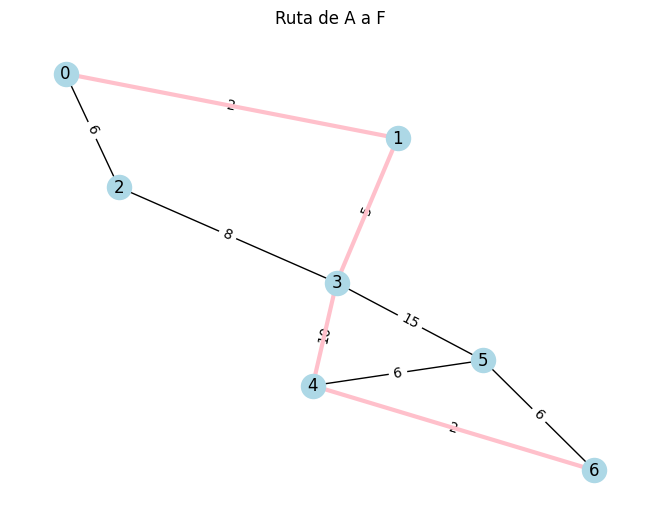

In [42]:
#Dibujar la ruta más corta sobre el grafo
ruta_edges = list(zip(ruta_mas_corta, ruta_mas_corta[1:]))

plt.figure()
nx.draw(D, pos, with_labels=True, node_color="lightblue")
nx.draw_networkx_edge_labels(D, pos, edge_labels={(u, v): d["weight"] for u, v, d in D.edges(data=True)})
nx.draw_networkx_edges(D, pos, edgelist=ruta_edges, edge_color="pink", width=3)  # Ruta más corta resaltada
plt.title("Ruta de A a F")
plt.show()

##FLUJO MAXIMO

El modelo de flujo máximo es una técnica de optimización utilizada para determinar la mayor cantidad de flujo que puede pasar a través de una red desde un origen hasta un destino, utilizando nodos, arcos y capacidades. El algoritmo de Ford-Fulkerson es el método común para encontrar el flujo máximo, que se ajusta iterativamente a través de caminos aumentantes hasta que no se pueden encontrar más caminos. Además, el documento destaca la importancia del manejo de capacidades residuales para garantizar la convergencia del algoritmo y su aplicación en diversas áreas como logística y telecomunicaciones.

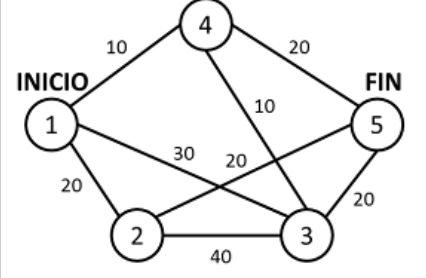

In [19]:
#Crear el grafo
F = nx.DiGraph()

edges = [
    ("1", "2", 20), ("1", "4", 10), ("1", "3", 30),
    ("2", "5", 20), ("2", "3", 40),
    ("3", "4", 10), ("3", "5", 20),
    ("4", "5", 20)
]


In [20]:
#Agregar aristas con atributo 'capacity'
F.add_weighted_edges_from(edges, weight="capacity")


In [22]:
# --- Calcular flujo máximo ---
flow_value, flow_dict = nx.maximum_flow(F, "1", "5", capacity="capacity")

print("🔹 Flujo máximo:", flow_value)
print("\nDistribución de flujo:")
for u in flow_dict:
    for v in flow_dict[u]:
        if flow_dict[u][v] > 0:
            print(f"{u} -> {v}: {flow_dict[u][v]}")

🔹 Flujo máximo: 60

Distribución de flujo:
1 -> 2: 20
1 -> 4: 10
1 -> 3: 30
2 -> 5: 20
4 -> 5: 20
3 -> 4: 10
3 -> 5: 20


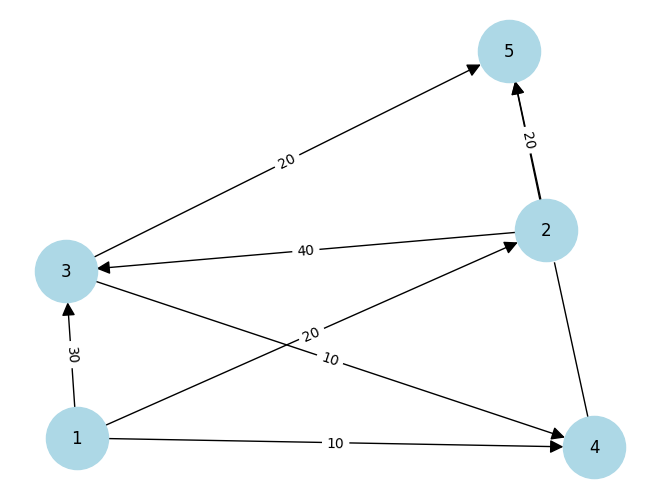

In [24]:
#Dibujar el grafo
pos = nx.spring_layout(F, seed=42)
plt.figure()
nx.draw(F, pos, with_labels=True, node_size=2000, node_color="lightblue", arrowsize=20)
labels = {(u,v):d["capacity"] for u,v,d in F.edges(data=True)}
nx.draw_networkx_edge_labels(F, pos, edge_labels=labels)
plt.show()


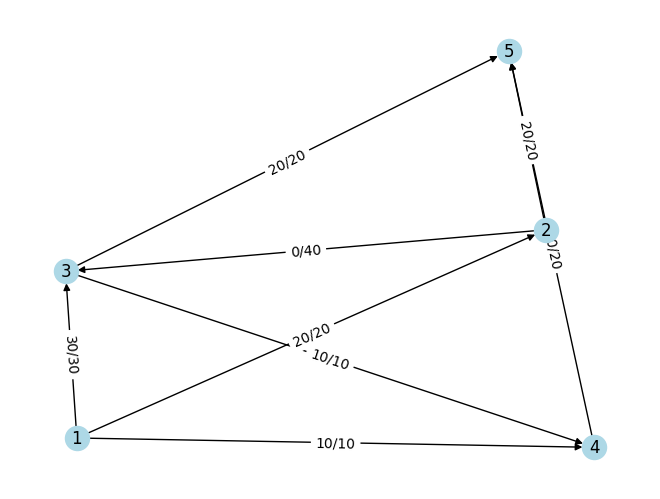

In [28]:

#Grafo con flujos resultantes
flow_edges = [(u, v, f"{flow_dict[u][v]}/{F[u][v]['capacity']}") for u,v in F.edges()]
plt.figure()
nx.draw(F, pos, with_labels=True, node_color="lightblue")
flow_labels = {(u,v): lbl for u,v,lbl in flow_edges}
nx.draw_networkx_edge_labels(F, pos, edge_labels=flow_labels)
plt.show()

In [27]:
#Calcular y mostrar únicamente el valor numérico del flujo máximo
flow_value, flow_dict = nx.maximum_flow(F, "1", "5", capacity="capacity")
print("Flujo máximo (valor numérico):", flow_value)


Flujo máximo (valor numérico): 60
